In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from scipy.stats import wilcoxon, shapiro, norm

load data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
images = np.load('/content/drive/MyDrive/Arlette/Sets for Training /Dataset with iPhone/test_images_160x320.npy')
true_landamarks = np.load('/content/drive/MyDrive/Arlette/Sets for Training /Dataset with iPhone/test_landmarks.npy')

CNN_80_160 = np.load('/content/drive/MyDrive/Arlette/Model_Outputs/predictions_norm_CNN_full_augmentation_80_160.npy')
UNET_80_160 = np.load('/content/drive/MyDrive/Arlette/Model_Outputs/predictions_norm_UNET_full_augmentation_80_160.npy')

CNN_160_320 = np.load('/content/drive/MyDrive/Arlette/Model_Outputs/predictions_norm_CNN_full_augmentation.npy')
UNET_160_320 = np.load('/content/drive/MyDrive/Arlette/Model_Outputs/predictions_norm_UNET_full_augmentation.npy')

CNN_320_640 = np.load('/content/drive/MyDrive/Arlette/Model_Outputs/predictions_norm_CNN_full_augmentation_320_640.npy')
UNET_320_640 = np.load('/content/drive/MyDrive/Arlette/Model_Outputs/predictions_norm_UNET_full_augmentation_320_640.npy')

In [ ]:
print(images.shape)
print(true_landamarks.shape)

print(CNN_80_160.shape)
print(UNET_80_160.shape)
print(CNN_160_320.shape)
print(UNET_160_320.shape)
print(CNN_320_640.shape)
print(UNET_320_640.shape)

(987, 160, 320, 3)
(987, 18, 2)
(987, 18, 2)
(987, 18, 2)
(987, 18, 2)
(987, 18, 2)
(987, 18, 2)
(987, 18, 2)


calculate error

In [ ]:
height, width = 160, 320

def landmark_error(y_true, y_pred, width, height):
    y_true_dn = y_true.copy()
    y_pred_dn = y_pred.copy()
    y_true_dn[:, :, 0] *= width
    y_true_dn[:, :, 1] *= height
    y_pred_dn[:, :, 0] *= width
    y_pred_dn[:, :, 1] *= height
    return np.sqrt(((y_true_dn - y_pred_dn)**2).sum(axis=2)).mean(axis=1)

errors_CNN_80_160 = landmark_error(true_landamarks, CNN_80_160, width, height)
errors_UNET_80_160 = landmark_error(true_landamarks, UNET_80_160, width, height)

errors_CNN_160_320 = landmark_error(true_landamarks, CNN_160_320, width, height)
errors_UNET_160_320 = landmark_error(true_landamarks, UNET_160_320, width, height)

errors_CNN_320_640 = landmark_error(true_landamarks, CNN_320_640, width, height)
errors_UNET_320_640 = landmark_error(true_landamarks, UNET_320_640, width, height)

plot

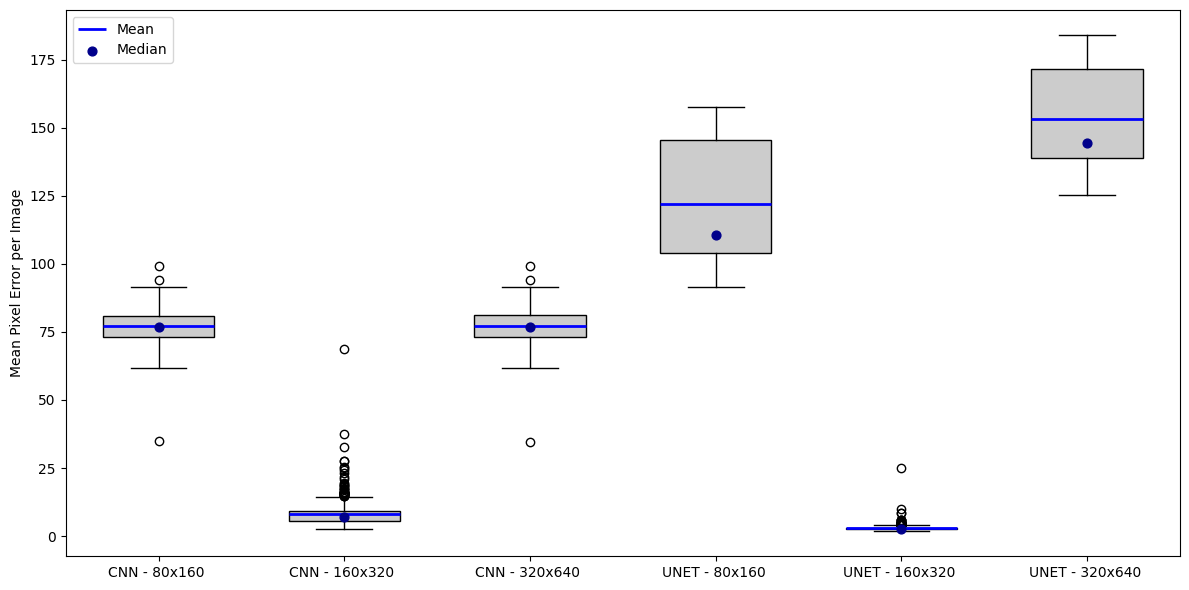

In [ ]:
height, width = 160, 320

# error array
errors_list = [errors_CNN_80_160, errors_CNN_160_320, errors_CNN_320_640, errors_UNET_80_160, errors_UNET_160_320, errors_UNET_320_640]

labels = ["CNN - 80x160 ", "CNN - 160x320 ", "CNN - 320x640 ", "UNET - 80x160 ", "UNET - 160x320 ", "UNET - 320x640 "]

fig, ax = plt.subplots(figsize=(12,6))

# boxplots without outliers
box = ax.boxplot(
    errors_list,
    patch_artist=True,
    widths=0.6,
    showfliers=True,
    medianprops=dict(color='white', linewidth=0)
)

# grey
for patch in box['boxes']:
    patch.set_facecolor('#CCCCCC')

# mean line
for i, d in enumerate(errors_list):
    mean_val = np.mean(d)
    x_left = i + 1 - 0.3
    x_right = i + 1 + 0.3
    ax.hlines(mean_val, x_left, x_right, color='blue', linewidth=2, label='Mean' if i==0 else "")

# median dot
for i, d in enumerate(errors_list):
    median_val = np.median(d)
    ax.scatter(i+1, median_val, color='darkblue', s=40, zorder=3, label='Median' if i==0 else "")

ax.set_xticklabels(labels)
ax.set_ylabel('Mean Pixel Error per Image')
ax.legend(loc='upper left')

plt.tight_layout()
plt.show()

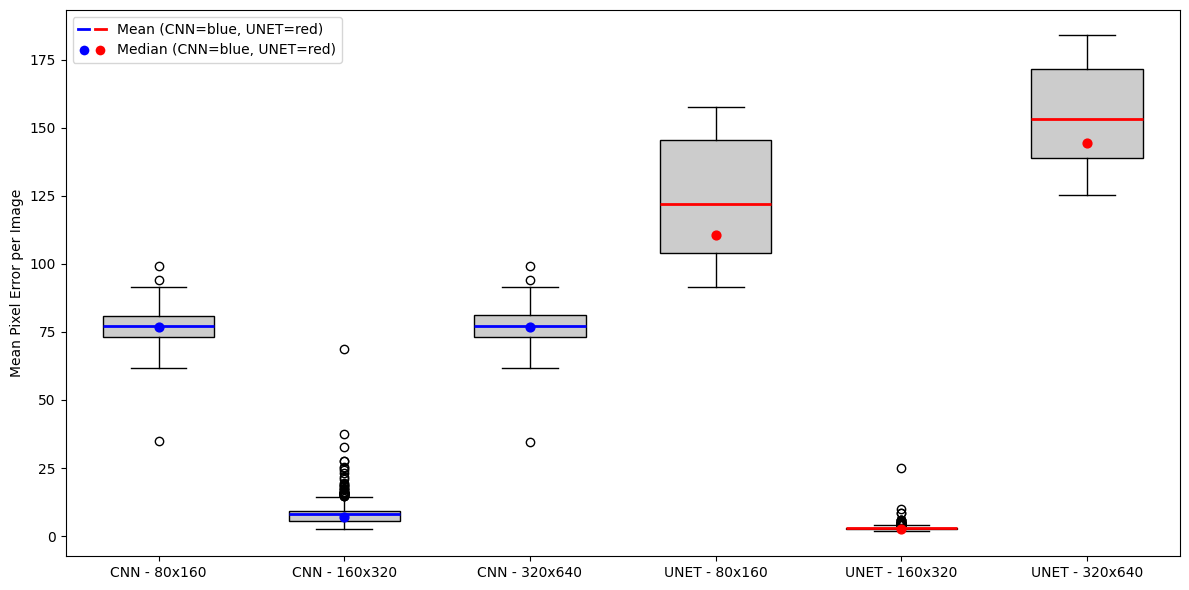

In [ ]:
height, width = 160, 320

errors_list = [errors_CNN_80_160, errors_CNN_160_320, errors_CNN_320_640,
               errors_UNET_80_160, errors_UNET_160_320, errors_UNET_320_640]

labels = ["CNN - 80x160", "CNN - 160x320", "CNN - 320x640",
          "UNET - 80x160", "UNET - 160x320", "UNET - 320x640"]

fig, ax = plt.subplots(figsize=(12,6))

# boxplot without median
box = ax.boxplot(
    errors_list,
    patch_artist=True,
    widths=0.6,
    showfliers=True,
    medianprops=dict(color='white', linewidth=0)
)

# box grey
for patch in box['boxes']:
    patch.set_facecolor('#CCCCCC')

# color per model
colors = ['blue','blue','blue','red','red','red']

# mean line and median dot
for i, (d, c) in enumerate(zip(errors_list, colors)):
    mean_val = np.mean(d)
    median_val = np.median(d)

    # mean
    x_left = i + 1 - 0.3
    x_right = i + 1 + 0.3
    ax.hlines(mean_val, x_left, x_right, color=c, linewidth=2)

    # median
    ax.scatter(i+1, median_val, color=c, s=40, zorder=3)

ax.set_xticklabels(labels)
ax.set_ylabel('Mean Pixel Error per Image')

# legend
mean_handle_blue = Line2D([0], [0], color='blue', lw=2)
mean_handle_red = Line2D([0], [0], color='red', lw=2)
median_handle_blue = Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=8)
median_handle_red = Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=8)

# legend: two elements, besides mix
ax.legend(
    handles=[(mean_handle_blue, mean_handle_red), (median_handle_blue, median_handle_red)],
    labels=['Mean (CNN=blue, UNET=red)', 'Median (CNN=blue, UNET=red)'],
    handler_map={tuple: matplotlib.legend_handler.HandlerTuple(ndivide=None)},
    loc='upper left'
)

plt.tight_layout()
plt.show()

get table

In [ ]:
stats = []
for label, d in zip(labels, errors_list):
    stats.append({
        "Model": label,
        "Mean ± SD": f"{np.mean(d):.2f} ± {np.std(d):.2f}",
        "Median": f"{np.median(d):.2f}"
    })

df_stats = pd.DataFrame(stats)

            Model       Mean ± SD  Median
0    CNN - 80x160    77.17 ± 5.42   76.94
1   CNN - 160x320     7.94 ± 3.92    7.12
2   CNN - 320x640    77.16 ± 5.46   76.91
3   UNET - 80x160  122.02 ± 20.88  110.50
4  UNET - 160x320     2.85 ± 0.97    2.69
5  UNET - 320x640  153.15 ± 16.71  144.43


In [ ]:
df_stats.head(6)

,Model,Mean ± SD,Median
0,CNN - 80x160,77.17 ± 5.42,76.94
1,CNN - 160x320,7.94 ± 3.92,7.12
2,CNN - 320x640,77.16 ± 5.46,76.91
3,UNET - 80x160,122.02 ± 20.88,110.50
4,UNET - 160x320,2.85 ± 0.97,2.69
5,UNET - 320x640,153.15 ± 16.71,144.43


statistical tests

In [ ]:
#test for normality
def normality_test(groups, labels):
    print("\nShapiro-Wilk Test for Normality:")
    for g, label in zip(groups, labels):
        stat, p = stats.shapiro(g)
        print(f"{label}: W={stat:.3f}, p={p:.3e}")

# CNN
normality_test(
    [errors_CNN_80_160, errors_CNN_160_320, errors_CNN_320_640],
    ["CNN 80x160", "CNN 160x320", "CNN 320x640"])

# U-Net
normality_test(
    [errors_UNET_80_160, errors_UNET_160_320, errors_UNET_320_640],
    ["U-Net 80x160", "U-Net 160x320", "U-Net 320x640"])



Shapiro-Wilk Test for Normality:
CNN 80x160: W=0.975, p=6.417e-12
CNN 160x320: W=0.691, p=4.856e-39
CNN 320x640: W=0.975, p=4.352e-12

Shapiro-Wilk Test for Normality:
U-Net 80x160: W=0.815, p=3.491e-32
U-Net 160x320: W=0.461, p=2.617e-47
U-Net 320x640: W=0.843, p=4.262e-30


all cases p <0.05 no normality distribution --> non parametric tests

In [ ]:
# pairs for comparison
pairs = [
    ("CNN", "80x160 vs 160x320", errors_CNN_80_160, errors_CNN_160_320),
    ("CNN", "80x160 vs 320x640", errors_CNN_80_160, errors_CNN_320_640),
    ("CNN", "160x320 vs 320x640", errors_CNN_160_320, errors_CNN_320_640),
    ("UNET", "80x160 vs 160x320", errors_UNET_80_160, errors_UNET_160_320),
    ("UNET", "80x160 vs 320x640", errors_UNET_80_160, errors_UNET_320_640),
    ("UNET", "160x320 vs 320x640", errors_UNET_160_320, errors_UNET_320_640)
]

results = []

for model, desc, group1, group2 in pairs:
    # pair differencen
    diff = group1 - group2

    # shapiro normality
    shapiro_stat, shapiro_p = shapiro(diff)
    normality = "Yes" if shapiro_p > 0.05 else "No"

    # wilcoxon signed-rank test
    stat, p_val = wilcoxon(group1, group2)

    # effectsiue r
    N = len(group1)
    z_val = (stat - N*(N+1)/4) / np.sqrt(N*(N+1)*(2*N+1)/24)
    r = abs(z_val) / np.sqrt(N)


    results.append({
        "Model": model,
        "Comparison": desc,
        "Shapiro-Wilk stat": round(shapiro_stat, 6),
        "Shapiro-Wilk p-value": round(shapiro_p, 6),
        "Normal?": normality,
        "Wilcoxon stat": stat,
        "Wilcoxon p-value": round(p_val, 10),
        "Effect size r": round(r, 4)})

df_results = pd.DataFrame(results)

In [ ]:
df_results.head(6)

,Model,Comparison,Shapiro-Wilk stat,Shapiro-Wilk p-value,Normal?,Wilcoxon stat,Wilcoxon p-value,Effect size r
0,CNN,80x160 vs 160x320,0.815717,0.0,No,1.0,0.000000e+00,0.8662
1,CNN,80x160 vs 320x640,0.763793,0.0,No,190449.0,2.600000e-09,0.1895
2,CNN,160x320 vs 320x640,0.816452,0.0,No,1.0,0.000000e+00,0.8662
3,UNET,80x160 vs 160x320,0.816761,0.0,No,0.0,0.000000e+00,0.8662
4,UNET,80x160 vs 320x640,0.877743,0.0,No,0.0,0.000000e+00,0.8662
5,UNET,160x320 vs 320x640,0.845766,0.0,No,0.0,0.000000e+00,0.8662


boxplots: error per landmark for all resolutins

/tmp/ipython-input-2398398953.py:41: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = plt.boxplot(errors, patch_artist=True, labels=landmark_labels)


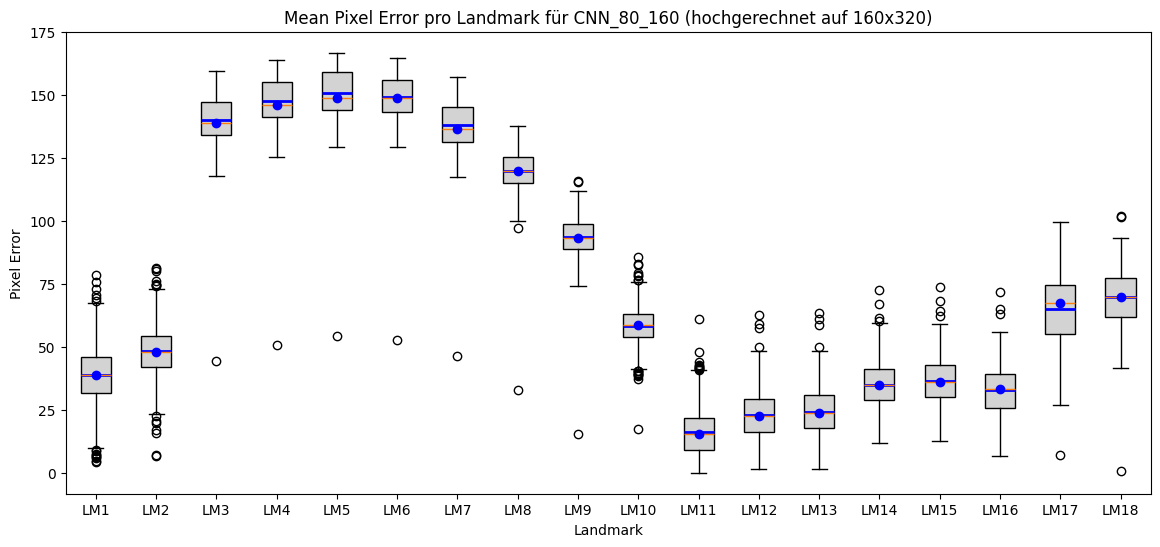

/tmp/ipython-input-2398398953.py:41: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = plt.boxplot(errors, patch_artist=True, labels=landmark_labels)


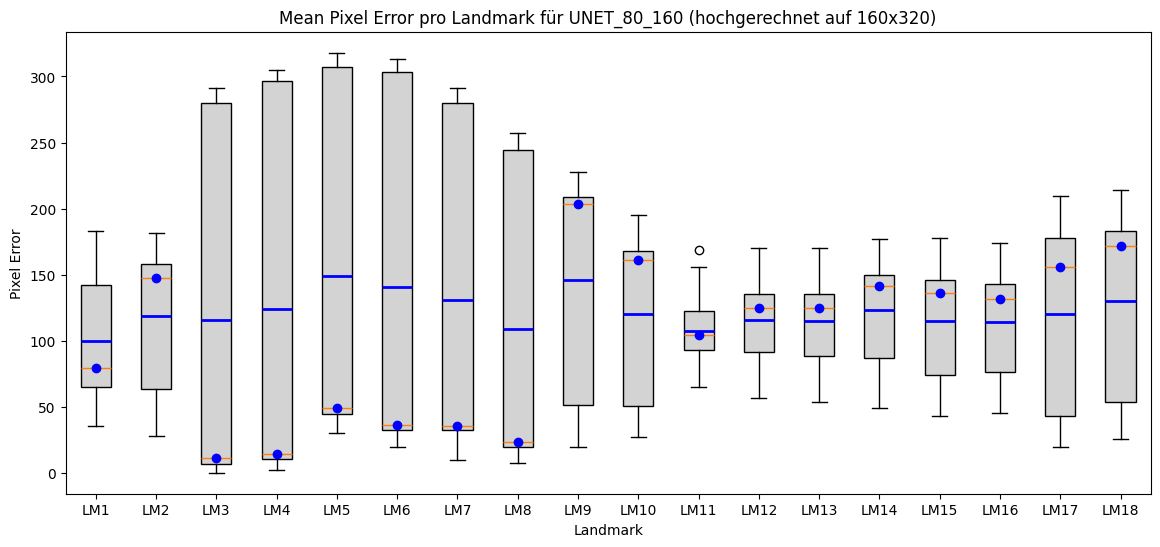

/tmp/ipython-input-2398398953.py:41: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = plt.boxplot(errors, patch_artist=True, labels=landmark_labels)


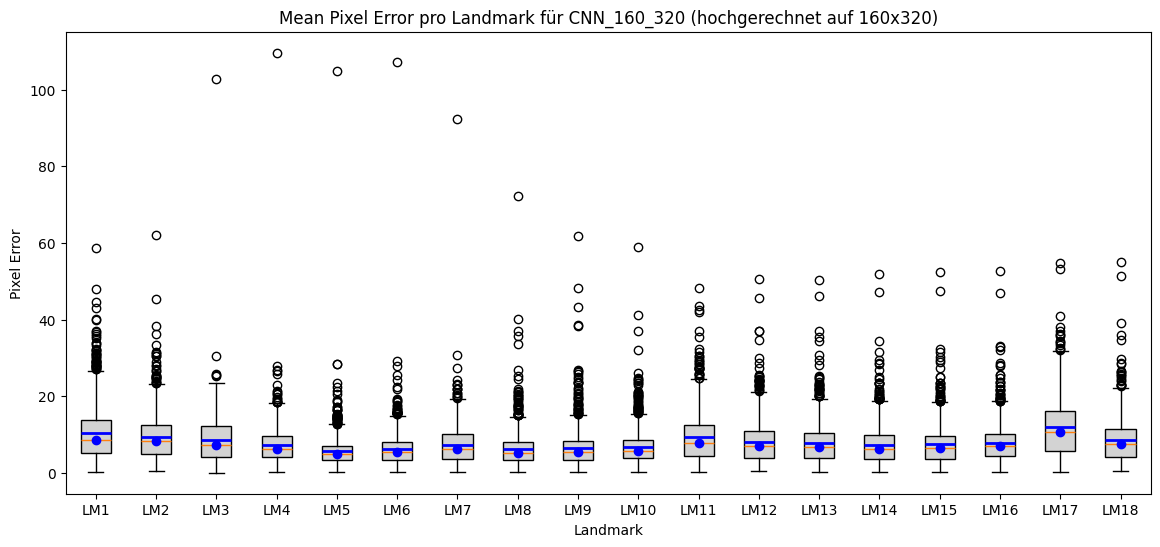

/tmp/ipython-input-2398398953.py:41: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = plt.boxplot(errors, patch_artist=True, labels=landmark_labels)


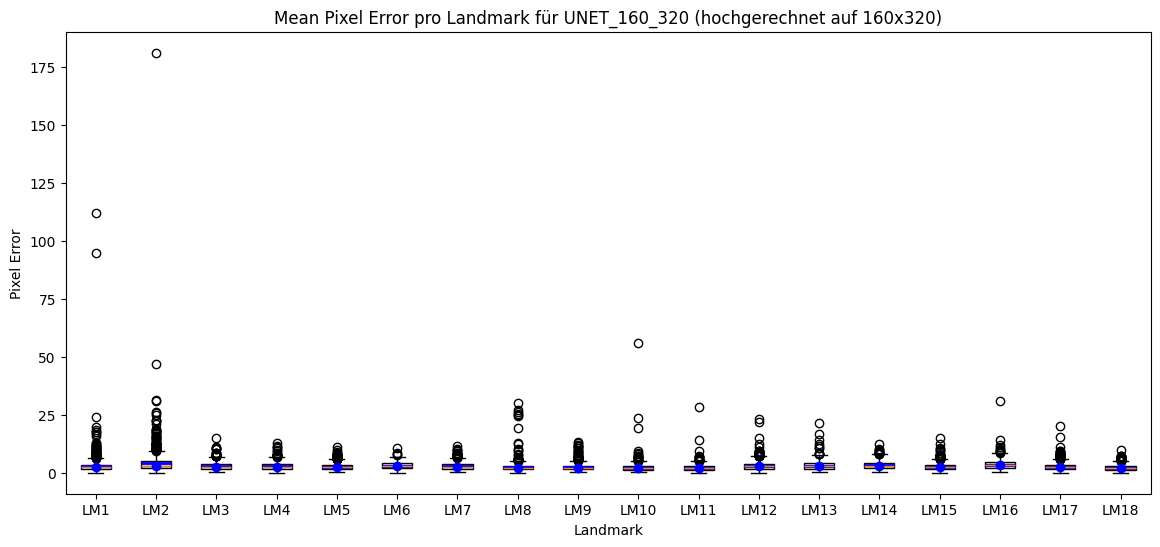

/tmp/ipython-input-2398398953.py:41: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = plt.boxplot(errors, patch_artist=True, labels=landmark_labels)


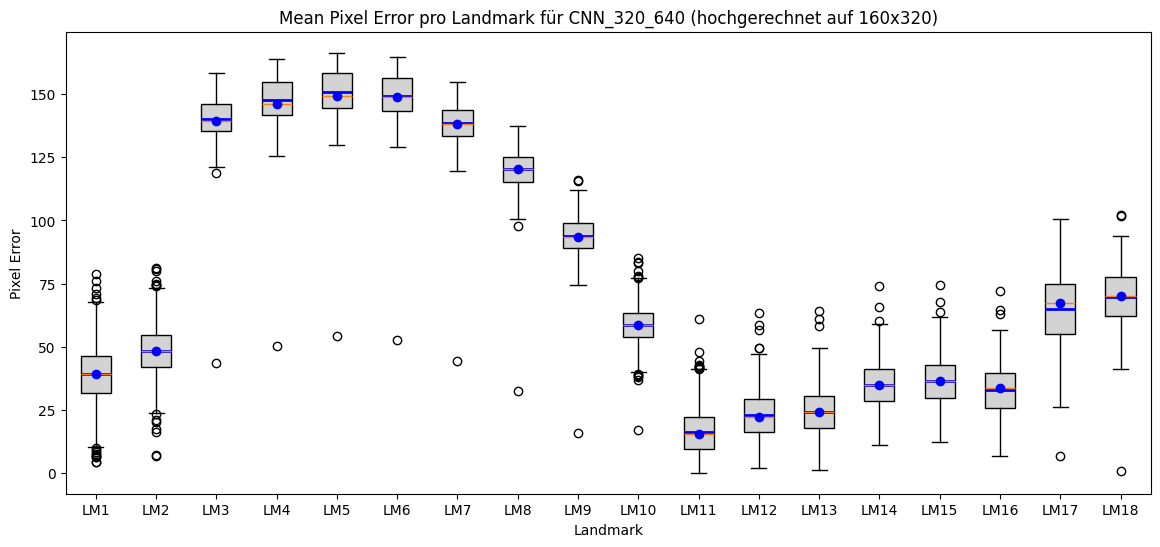

/tmp/ipython-input-2398398953.py:41: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = plt.boxplot(errors, patch_artist=True, labels=landmark_labels)


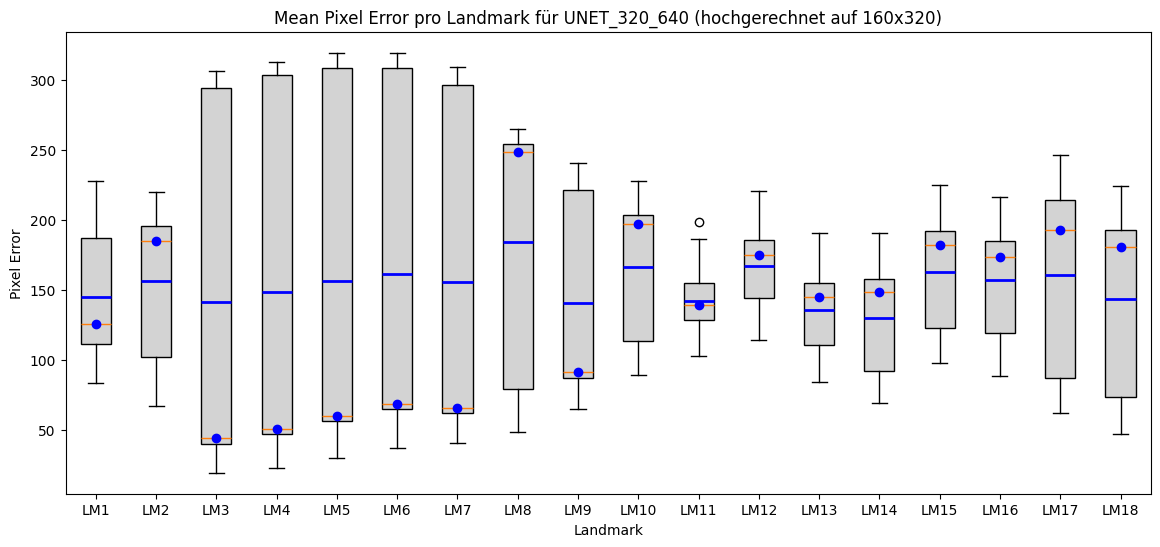

In [ ]:
# data
true_landmarks = np.load('/content/drive/MyDrive/Arlette/Sets for Training /Dataset with iPhone/test_landmarks.npy')

predictions = {
    "CNN_80_160": np.load('/content/drive/MyDrive/Arlette/Model_Outputs/predictions_norm_CNN_full_augmentation_80_160.npy'),
    "UNET_80_160": np.load('/content/drive/MyDrive/Arlette/Model_Outputs/predictions_norm_UNET_full_augmentation_80_160.npy'),
    "CNN_160_320": np.load('/content/drive/MyDrive/Arlette/Model_Outputs/predictions_norm_CNN_full_augmentation.npy'),
    "UNET_160_320": np.load('/content/drive/MyDrive/Arlette/Model_Outputs/predictions_norm_UNET_full_augmentation.npy'),
    "CNN_320_640": np.load('/content/drive/MyDrive/Arlette/Model_Outputs/predictions_norm_CNN_full_augmentation_320_640.npy'),
    "UNET_320_640": np.load('/content/drive/MyDrive/Arlette/Model_Outputs/predictions_norm_UNET_full_augmentation_320_640.npy')}

# scale 160 x 320
target_scale = (320, 160)

def compute_mean_pixel_error(true, pred, scale):
    # scale 160 x 320
    true_scaled = true.copy()
    pred_scaled = pred.copy()
    true_scaled[...,0] *= scale[0]
    true_scaled[...,1] *= scale[1]
    pred_scaled[...,0] *= scale[0]
    pred_scaled[...,1] *= scale[1]

    # euclidean distance per landmark and sample
    errors = np.sqrt(np.sum((true_scaled - pred_scaled)**2, axis=2))  # axis=2: x/y
    return errors  # shape: (samples, landmarks)

landmark_labels = [f'LM{i+1}' for i in range(true_landmarks.shape[1])]
resolutions = ["80_160", "160_320", "320_640"]

for res in resolutions:
    for model in ["CNN_" + res, "UNET_" + res]:
        errors = compute_mean_pixel_error(true_landmarks, predictions[model], target_scale)

        plt.figure(figsize=(14,6))
        # box grey
        bp = plt.boxplot(errors, patch_artist=True, labels=landmark_labels)
        for box in bp['boxes']:
            box.set(facecolor='lightgrey')

        # mean blue line
        means = errors.mean(axis=0)
        for i, mean in enumerate(means):
            plt.hlines(mean, i+1-0.25, i+1+0.25, color='blue', linewidth=2)

        # median blue dot
        medians = np.median(errors, axis=0)
        plt.scatter(range(1, len(medians)+1), medians, color='blue', zorder=3)

        plt.title(f'Mean Pixel Error pro Landmark für {model} (hochgerechnet auf 160x320)')
        plt.ylabel('Pixel Error')
        plt.xlabel('Landmark')
        plt.show()


plot onlx for landmark 3 to 9

/tmp/ipython-input-4070410543.py:36: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(
/tmp/ipython-input-4070410543.py:36: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(


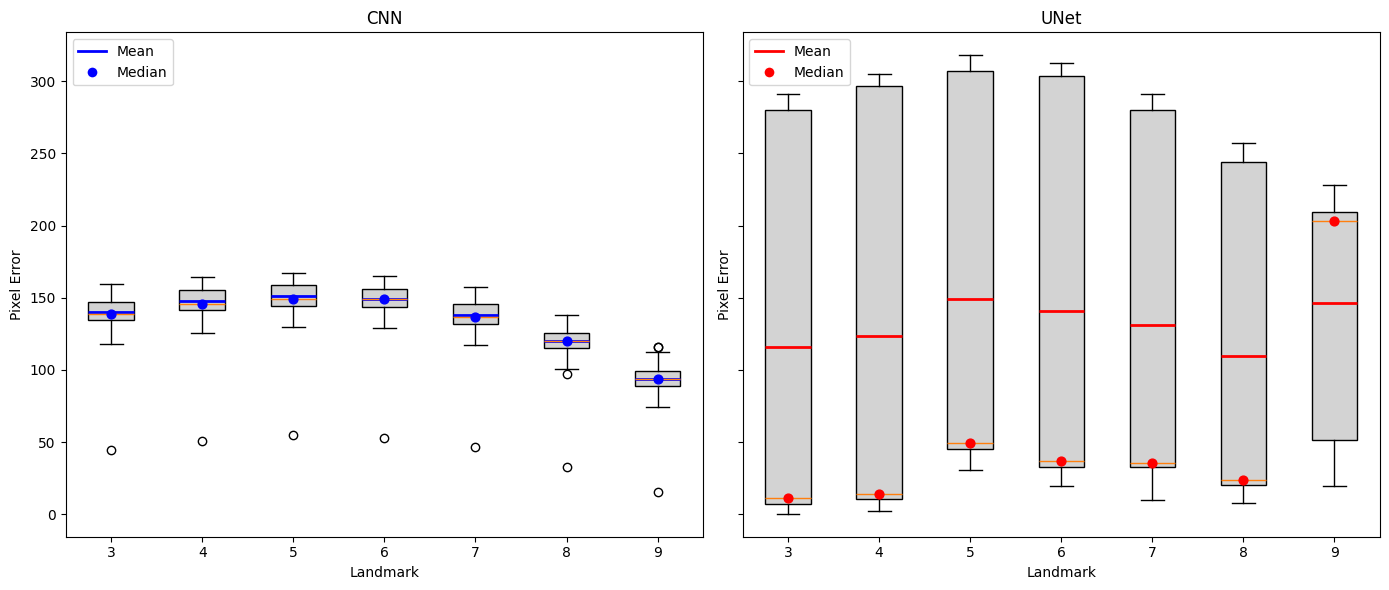

In [ ]:
# data
true_landmarks = np.load('/content/drive/MyDrive/Arlette/Sets for Training /Dataset with iPhone/test_landmarks.npy')

predictions = {"CNN": np.load('/content/drive/MyDrive/Arlette/Model_Outputs/predictions_norm_CNN_full_augmentation_80_160.npy'),
               "UNET": np.load('/content/drive/MyDrive/Arlette/Model_Outputs/predictions_norm_UNET_full_augmentation_80_160.npy')}

width, height = 320, 160

def compute_errors(true, pred):
    true_scaled = true.copy()
    pred_scaled = pred.copy()
    true_scaled[...,0] *= width
    true_scaled[...,1] *= height
    pred_scaled[...,0] *= width
    pred_scaled[...,1] *= height
    errors = np.sqrt(np.sum((true_scaled - pred_scaled)**2, axis=2))
    return errors

errors_CNN = compute_errors(true_landmarks, predictions["CNN"])
errors_UNET = compute_errors(true_landmarks, predictions["UNET"])

# landmarks 3–9
landmarks_range = range(2, 9)
landmark_labels = [f'{i+1}' for i in landmarks_range]

fig, axes = plt.subplots(1, 2, figsize=(14,6), sharey=True)

for ax, model_name, errors, color in zip(axes, ["CNN", "UNet"], [errors_CNN, errors_UNET], ['blue','red']):
    # boxplots
    bp = ax.boxplot(
        [errors[:,i] for i in landmarks_range],
        patch_artist=True,
        labels=landmark_labels,
        showfliers=True
    )
    for box in bp['boxes']:
        box.set_facecolor('lightgrey')

    # mean line
    means = np.mean(errors[:,landmarks_range], axis=0)
    for i, mean in enumerate(means):
        ax.hlines(mean, i+1-0.25, i+1+0.25, color=color, linewidth=2)

    # median dot
    medians = np.median(errors[:,landmarks_range], axis=0)
    ax.scatter(range(1, len(medians)+1), medians, color=color, s=40, zorder=3)

    ax.set_title(f'{model_name}')
    ax.set_xlabel('Landmark')
    ax.set_ylabel('Pixel Error')

    # Eigene Legende pro Subplot
    custom_lines = [
        Line2D([0], [0], color=color, lw=2),
        Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=8)
    ]
    ax.legend(custom_lines, ['Mean', 'Median'], loc='upper left')

plt.tight_layout()
plt.show()